Appending Data to xarray.Datasets
================================


In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

# Set plot style
plt.style.use('ggplot')

Introduction
-----------

When working with climate data, satellite observations, or any multi-dimensional data, you'll often need to combine or append datasets. This tutorial demonstrates various methods to append data to existing xarray.Dataset objects.

Prerequisites
------------

To follow along with this tutorial, you'll need:

.. jupyter-execute::

In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

print(f"xarray version: {xr.__version__}")

xarray version: 2025.1.2


Creating Sample Datasets
-----------------------

Let's create some sample datasets to work with:

.. jupyter-execute::

In [4]:
# Create a simple dataset with temperature data
times = pd.date_range("2023-01-01", periods=5)
lats = np.linspace(0, 10, 3)
lons = np.linspace(0, 10, 2)

# First dataset
temp_data = np.random.rand(5, 3, 2) * 30  # Random temperatures between 0-30°C
ds1 = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "lat", "lon"], temp_data, {"units": "°C"})
    ),
    coords=dict(
        time=times,
        lat=lats,
        lon=lons,
    ),
    attrs=dict(description="Temperature dataset"),
)

print("Dataset 1:")
print(ds1)

# Second dataset with different time range
times2 = pd.date_range("2023-01-06", periods=3)
temp_data2 = np.random.rand(3, 3, 2) * 30
ds2 = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "lat", "lon"], temp_data2, {"units": "°C"})
    ),
    coords=dict(
        time=times2,
        lat=lats,
        lon=lons,
    ),
    attrs=dict(description="Temperature dataset - continued"),
)

print("\nDataset 2:")
print(ds2)

Dataset 1:
<xarray.Dataset> Size: 320B
Dimensions:      (time: 5, lat: 3, lon: 2)
Coordinates:
  * time         (time) datetime64[ns] 40B 2023-01-01 2023-01-02 ... 2023-01-05
  * lat          (lat) float64 24B 0.0 5.0 10.0
  * lon          (lon) float64 16B 0.0 10.0
Data variables:
    temperature  (time, lat, lon) float64 240B 14.47 7.238 23.9 ... 14.55 12.22
Attributes:
    description:  Temperature dataset

Dataset 2:
<xarray.Dataset> Size: 208B
Dimensions:      (time: 3, lat: 3, lon: 2)
Coordinates:
  * time         (time) datetime64[ns] 24B 2023-01-06 2023-01-07 2023-01-08
  * lat          (lat) float64 24B 0.0 5.0 10.0
  * lon          (lon) float64 16B 0.0 10.0
Data variables:
    temperature  (time, lat, lon) float64 144B 25.45 26.81 5.162 ... 15.62 5.317
Attributes:
    description:  Temperature dataset - continued


Method 1: Concatenating Along a Dimension
----------------------------------------

The most common way to append data is using ``xr.concat()``. This method combines datasets along a specified dimension.

.. jupyter-execute::

Combined Dataset:
<xarray.Dataset> Size: 488B
Dimensions:      (time: 8, lat: 3, lon: 2)
Coordinates:
  * time         (time) datetime64[ns] 64B 2023-01-01 2023-01-02 ... 2023-01-08
  * lat          (lat) float64 24B 0.0 5.0 10.0
  * lon          (lon) float64 16B 0.0 10.0
Data variables:
    temperature  (time, lat, lon) float64 384B 14.47 7.238 23.9 ... 15.62 5.317
Attributes:
    description:  Temperature dataset


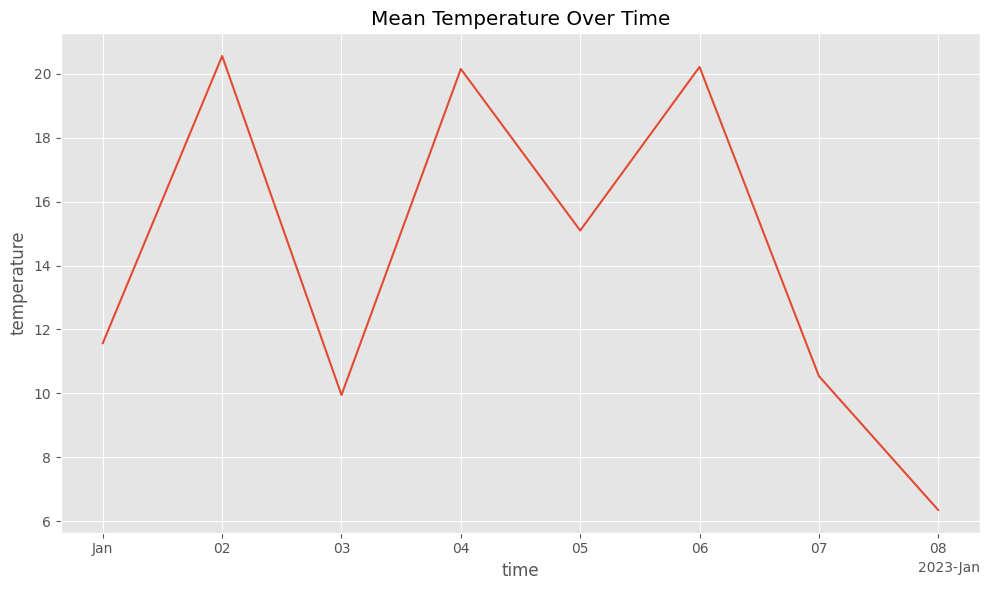

In [5]:
# Concatenate along the time dimension
combined_ds = xr.concat([ds1, ds2], dim="time")

print("Combined Dataset:")
print(combined_ds)

# Visualize the combined data
plt.figure(figsize=(10, 6))
combined_ds.temperature.mean(dim=["lat", "lon"]).plot()
plt.title("Mean Temperature Over Time")
plt.tight_layout()
plt.show()

Method 2: Using merge() for Different Variables
---------------------------------------------

If you have datasets with different variables that you want to combine, use ``xr.merge()``:

.. jupyter-execute::

In [ ]:
# Create a dataset with humidity data
humidity_data = np.random.rand(5, 3, 2) * 100  # Random humidity between 0-100%
ds_humidity = xr.Dataset(
    data_vars=dict(
        humidity=(["time", "lat", "lon"], humidity_data, {"units": "%"})
    ),
    coords=dict(
        time=times,
        lat=lats,
        lon=lons,
    ),
    attrs=dict(description="Humidity dataset"),
)

print("Humidity Dataset:")
print(ds_humidity)

# Merge temperature and humidity datasets
merged_ds = xr.merge([ds1, ds_humidity])

print("\nMerged Dataset (with temperature and humidity):")
print(merged_ds)

# Plot both variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

merged_ds.temperature.isel(time=0).plot(ax=ax1)
ax1.set_title("Temperature (°C)")

merged_ds.humidity.isel(time=0).plot(ax=ax2)
ax2.set_title("Humidity (%)")

plt.tight_layout()
plt.show()

Method 3: Combining Datasets with Different Coordinates
----------------------------------------------------

Sometimes you need to combine datasets with different coordinate values:

.. jupyter-execute::

In [ ]:
# Create a dataset with different latitude values
new_lats = np.linspace(15, 25, 3)
temp_data3 = np.random.rand(5, 3, 2) * 30
ds3 = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "lat", "lon"], temp_data3, {"units": "°C"})
    ),
    coords=dict(
        time=times,
        lat=new_lats,
        lon=lons,
    ),
    attrs=dict(description="Temperature dataset - different region"),
)

print("Dataset 3 (different latitudes):")
print(ds3)

# Concatenate along the latitude dimension
combined_lat_ds = xr.concat([ds1, ds3], dim="lat")

print("\nCombined Dataset (extended latitude range):")
print(combined_lat_ds)

# Visualize the combined data
plt.figure(figsize=(10, 6))
combined_lat_ds.temperature.isel(time=0).plot()
plt.title("Temperature at First Time Step")
plt.tight_layout()
plt.show()

Method 4: Using combine_first() for Filling Missing Data
------------------------------------------------------

The ``combine_first()`` method is useful when you want to update a dataset with values from another dataset, but only where data is missing:

.. jupyter-execute::

In [ ]:
# Create a dataset with some missing values
temp_data_partial = np.random.rand(5, 3, 2) * 30
temp_data_partial[1:3, :, :] = np.nan  # Set some values to NaN

ds_partial = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "lat", "lon"], temp_data_partial, {"units": "°C"})
    ),
    coords=dict(
        time=times,
        lat=lats,
        lon=lons,
    ),
    attrs=dict(description="Temperature dataset with missing values"),
)

print("Dataset with missing values:")
print(ds_partial)

# Create a dataset with values to fill the gaps
temp_data_fill = np.random.rand(5, 3, 2) * 30
ds_fill = xr.Dataset(
    data_vars=dict(
        temperature=(["time", "lat", "lon"], temp_data_fill, {"units": "°C"})
    ),
    coords=dict(
        time=times,
        lat=lats,
        lon=lons,
    ),
    attrs=dict(description="Dataset to fill missing values"),
)

# Fill missing values
filled_ds = ds_partial.combine_first(ds_fill)

print("\nDataset after filling missing values:")
print(filled_ds)

# Visualize before and after
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ds_partial.temperature.mean(dim="lon").plot(ax=ax1, robust=True)
ax1.set_title("Before Filling (with NaNs)")

filled_ds.temperature.mean(dim="lon").plot(ax=ax2, robust=True)
ax2.set_title("After Filling")

plt.tight_layout()
plt.show()

Method 5: Updating Attributes When Combining Datasets
---------------------------------------------------

When combining datasets, you might want to update the attributes:

.. jupyter-execute::

In [ ]:
# Combine datasets and update attributes
combined_ds = xr.concat([ds1, ds2], dim="time")

# Update attributes
combined_ds.attrs = {
    "description": "Combined temperature dataset",
    "time_range": f"{combined_ds.time.values[0]} to {combined_ds.time.values[-1]}",
    "source": "Tutorial example",
    "variables": "temperature",
}

print("Combined Dataset with Updated Attributes:")
print(combined_ds)
print("\nAttributes:")
for key, value in combined_ds.attrs.items():
    print(f"{key}: {value}")

Best Practices and Considerations
-------------------------------

When appending data to xarray Datasets, keep these tips in mind:

1. **Dimension Alignment**: Ensure that dimensions you're not concatenating along have the same values.
2. **Data Types**: Check that variables have compatible data types before combining.
3. **Attributes**: Decide how to handle attributes when combining datasets.
4. **Performance**: For very large datasets, consider using dask for parallel processing.

Example with Dask for Large Datasets
----------------------------------

For large datasets, you can use dask for better performance:

.. jupyter-execute::

In [ ]:
# Create a larger dataset with dask arrays
try:
    import dask.array as da
    
    # Create dask arrays
    large_times = pd.date_range("2023-01-01", periods=1000)
    large_lats = np.linspace(0, 90, 180)
    large_lons = np.linspace(-180, 180, 360)
    
    # Create a lazy dask array (no data loaded yet)
    large_data = da.random.random((1000, 180, 360), chunks=(100, 90, 90)) * 30
    
    large_ds = xr.Dataset(
        data_vars=dict(
            temperature=(["time", "lat", "lon"], large_data, {"units": "°C"})
        ),
        coords=dict(
            time=large_times,
            lat=large_lats,
            lon=large_lons,
        ),
    )
    
    print("Large Dataset with Dask Arrays:")
    print(large_ds)
    print(f"\nDask chunks: {large_ds.temperature.chunks}")
    print(f"Memory usage: {large_ds.temperature.nbytes / 1e9:.2f} GB (if loaded into memory)")
    
    # Create another dataset to append
    large_data2 = da.random.random((500, 180, 360), chunks=(100, 90, 90)) * 30
    large_times2 = pd.date_range("2023-01-01", periods=500) + pd.Timedelta(days=1000)
    
    large_ds2 = xr.Dataset(
        data_vars=dict(
            temperature=(["time", "lat", "lon"], large_data2, {"units": "°C"})
        ),
        coords=dict(
            time=large_times2,
            lat=large_lats,
            lon=large_lons,
        ),
    )
    
    # Concatenate large datasets
    combined_large_ds = xr.concat([large_ds, large_ds2], dim="time")
    print("\nCombined Large Dataset:")
    print(combined_large_ds)
    print(f"New time dimension size: {len(combined_large_ds.time)}")
    
except ImportError:
    print("Dask not available. Install with 'pip install dask'")

Conclusion
---------

In this tutorial, we've explored various methods to append data to xarray Datasets:

1. Using ``xr.concat()`` to combine along a dimension
2. Using ``xr.merge()`` to combine different variables
3. Combining datasets with different coordinates
4. Using ``combine_first()`` to fill missing data
5. Handling attributes when combining datasets
6. Using dask for large datasets

These techniques are essential for working with time series data, combining data from different sources, or extending spatial coverage in your datasets.

Further Reading
-------------

- `xarray Documentation on Combining Data <http://xarray.pydata.org/en/stable/combining.html>`_
- `Dask Integration with xarray <http://xarray.pydata.org/en/stable/dask.html>`_
- `xarray API Reference <http://xarray.pydata.org/en/stable/api.html>`_